In [11]:
#Import modules 
import time as T
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
import torch
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

#Go to the parent folder AI II FINAL CODE as main path 
try: 
    import os
    if str(os.getcwd())[-16:] != "AI II FINAL CODE": 
        os.chdir('../../AI II FINAL CODE/')
except:
    pass 

In [12]:
#Get current path 
#os.getcwd()

Gradient function erfPlus() is correct
Gradient function erfRelu() is correct
Gradient function squarePlus() is correct
Gradient function degreePlus() is correct


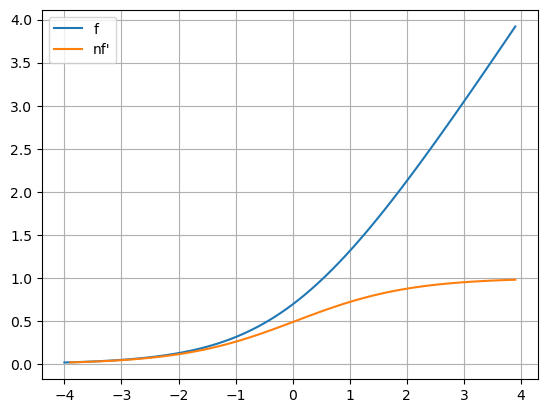

Using device: cuda


In [13]:
#Import local modules 
%run CurrentCode/Model2.ipynb
%run CurrentCode/actFunctions2.ipynb
%run CurrentCode/DeviceDataLoader2.ipynb

In [14]:
trialsPerExperiment = 10
#choose random seeds for trials 
seeds = [62337, 12341, 13424, 43124, 1413431, 1341, 132, 1765, 98786, 5634]

LR = [0.2, 0.1, 0.05, 0.01, 0.005]

actFuncList = [nn.ReLU, nn.GELU, squarePlus,  nn.Softplus, erfRelu, erfPlus] 
actFuncList_str = ['relu', 'gelu', 'squarplus', 'softplus','erfrelu', 'erfplus'] 


layers = [1, 2, 3, 5, 10, 20, 30, 50, 75, 100]

layer_hist = []

In [ ]:
totTime0 = T.time() 

#For each layer, do the following 
for layer in layers: 
    histories = [] 
    #For each trial, find a random seed and do the following 
    for ii in range(trialsPerExperiment): 
        SEED = np.random.randint(1,99999)
        batches = []
        for actFunc_num in range(len(actFuncList)):
            #Set seed for the model 
            set_seed(SEED)
            history = []
            t0 = T.time()
            #Make the model with the corresponding blocks of the residual block and put it in gpu or cpu of choice 
            model = ResNet(block=ResidualBlock, img_input_dim=28, layers=layer, actFunc=actFuncList[actFunc_num])
            to_device(model, device)
            
            #Fit the model 
            for jj in range(len(LR)):
                history += model.fit(epochs=5, lr=LR[jj], mo=0.1, train_loader=train_loader, val_loader=val_loader, print_statement=False)
            
            #Find final score of the model 
            score = -np.log(1-history[-1]['val_acc'])
            
            actFuncName = actFuncList_str[actFunc_num]
            
            #Print the results 
            print(f'Layers: {layer} Trial: {ii+1} Time (s): {T.time()-t0:.3f} Score: {score:.3f} AF: {actFuncName}')
            
            #Save the model 
            modelPath = "Models/Experiment3/" + f"M1_{layer}_{actFuncName}_{ii}_{SEED}"
            
            torch.save(model, modelPath)
            
            #Add the history of each activation function model to a batch 
            batches.append(history)
            
        #Add the batch to the trials 
        histories.append(batches)
    
    #Add the histories to the blocks list 
    layer_hist.append(histories)
    
totTime1 = T.time()

Layers: 1 Trial: 1 Time (s): 54.616 Score: 2.032 AF: relu
Layers: 1 Trial: 1 Time (s): 56.234 Score: 2.062 AF: gelu
Layers: 1 Trial: 1 Time (s): 56.464 Score: 1.999 AF: squarplus
Layers: 1 Trial: 1 Time (s): 56.874 Score: 1.951 AF: softplus
Layers: 1 Trial: 1 Time (s): 56.247 Score: 1.952 AF: erfrelu
Layers: 1 Trial: 1 Time (s): 57.744 Score: 1.938 AF: erfplus
Layers: 1 Trial: 2 Time (s): 55.603 Score: 1.776 AF: relu
Layers: 1 Trial: 2 Time (s): 56.259 Score: 1.774 AF: gelu
Layers: 1 Trial: 2 Time (s): 56.348 Score: 1.741 AF: squarplus
Layers: 1 Trial: 2 Time (s): 55.712 Score: 1.715 AF: softplus
Layers: 1 Trial: 2 Time (s): 56.925 Score: 1.714 AF: erfrelu
Layers: 1 Trial: 2 Time (s): 57.180 Score: 1.713 AF: erfplus
Layers: 1 Trial: 3 Time (s): 55.794 Score: 1.778 AF: relu
Layers: 1 Trial: 3 Time (s): 54.541 Score: 1.778 AF: gelu
Layers: 1 Trial: 3 Time (s): 56.407 Score: 1.733 AF: squarplus
Layers: 1 Trial: 3 Time (s): 55.156 Score: 1.884 AF: softplus
Layers: 1 Trial: 3 Time (s): 56.8

In [16]:
print(f"Experiment run time: {((totTime1-totTime0)/60):.3f} mins") 

Experiment run time: 990.109 mins


In [ ]:
#If NEWdata is true, then store the variable as a pickle object otherwise get the previous pickled result and add the current result together as the new pickle object 
NEWdata = True 

PATH = 'Results/Experiment3_pkl'

if NEWdata: 
    uploadObject(layer_hist, PATH, nosilence=True)
else:
    try: 
        prev_layer_hist = loadObject(PATH)
        print(len(prev_layer_hist))
        uploadObject(layer_hist + prev_layer_hist, PATH, nosilence=True)
    except:
        uploadObject(layer_hist, PATH, nosilence=True)
    

Time: 0.00800 s

----------------FINISHED SAVING----------------
Time: -1743218950.38345 s



In [18]:
len(histories)

10